In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
#Read CSV
merge_output = pd.read_csv("./zillow_census_m_OUTPUT.csv")


In [3]:
#Fill NaN with 0 (NaN values are for international migration. We are only interested in domestic migration)
merge_output = merge_output.fillna(0)

In [4]:
#Split County into two County and State columns
county_split = merge_output["County"].str.split(pat=', ', expand=True)
merge_output["State"] = county_split[1]
#filter for certain states
merge_output.set_index("County")

######SELECT STATES HERE#####
state_list = ['California', 'New York', 'Illinois', 'New Jersey']
merge_output = merge_output[merge_output["State"].isin(state_list)]

merge_output.head()

,Unnamed: 0,County,2009IN,2009NET,2009POP1YR,state,county,2010IN,2010NET,2010POP1YR,...,2015 Difference,2016 Difference,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change,State
5,5,"Adams County, Illinois",3830.0,-108.0,6557364,1683,99,1622.0,-392.0,3249582.0,...,3100,1300.0,1.573034,0.331858,1.764057,0.975081,2.789700,3.235908,1.314459,Illinois
15,15,"Alameda County, California",191112.0,-9506.0,1026152946,4284,714,94970.0,-6323.0,519927320.0,...,80700,43000.0,-3.242397,-7.187428,13.222112,24.939521,10.156663,12.895494,6.086341,California
17,17,"Albany County, New York",41278.0,4745.0,93033675,11340,315,20642.0,1833.0,46642755.0,...,2400,6200.0,-3.056112,-0.413437,-0.051894,1.505711,0.869565,1.217039,3.106212,New York
27,27,"Allegany County, New York",5200.0,2370.0,5623500,4140,345,2417.0,993.0,2771511.0,...,2300,2400.0,-0.337268,1.522843,5.833333,-5.354331,-0.499168,3.846154,3.864734,New York
33,33,"Alpine County, California",138.0,-42.0,4564,24,12,60.0,-35.0,2316.0,...,16500,56200.0,-15.294562,-7.445386,3.516378,2.000931,-5.337591,7.951807,25.089286,California


In [5]:
#Create column that has net total migration/change in price
net_cols = []
dif_cols = []

years = ['2009','2010', '2011', '2012', '2013', '2014']
for year in years:
    year2 = str(int(year) + 1)

    net_cols.append(f"{year}NET")
    dif_cols.append(f"{year2} Difference")

merge_output["TotalNET"] = merge_output[net_cols].sum(axis=1)
merge_output["Total Difference"] = merge_output[dif_cols].sum(axis=1)

merge_output.head()

,Unnamed: 0,County,2009IN,2009NET,2009POP1YR,state,county,2010IN,2010NET,2010POP1YR,...,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change,State,TotalNET,Total Difference
5,5,"Adams County, Illinois",3830.0,-108.0,6557364,1683,99,1622.0,-392.0,3249582.0,...,1.573034,0.331858,1.764057,0.975081,2.789700,3.235908,1.314459,Illinois,-5437.0,9900.0
15,15,"Alameda County, California",191112.0,-9506.0,1026152946,4284,714,94970.0,-6323.0,519927320.0,...,-3.242397,-7.187428,13.222112,24.939521,10.156663,12.895494,6.086341,California,-34763.0,259300.0
17,17,"Albany County, New York",41278.0,4745.0,93033675,11340,315,20642.0,1833.0,46642755.0,...,-3.056112,-0.413437,-0.051894,1.505711,0.869565,1.217039,3.106212,New York,15006.0,0.0
27,27,"Allegany County, New York",5200.0,2370.0,5623500,4140,345,2417.0,993.0,2771511.0,...,-0.337268,1.522843,5.833333,-5.354331,-0.499168,3.846154,3.864734,New York,8372.0,2800.0
33,33,"Alpine County, California",138.0,-42.0,4564,24,12,60.0,-35.0,2316.0,...,-15.294562,-7.445386,3.516378,2.000931,-5.337591,7.951807,25.089286,California,-523.0,-40800.0


<Figure size 7200x4800 with 0 Axes>

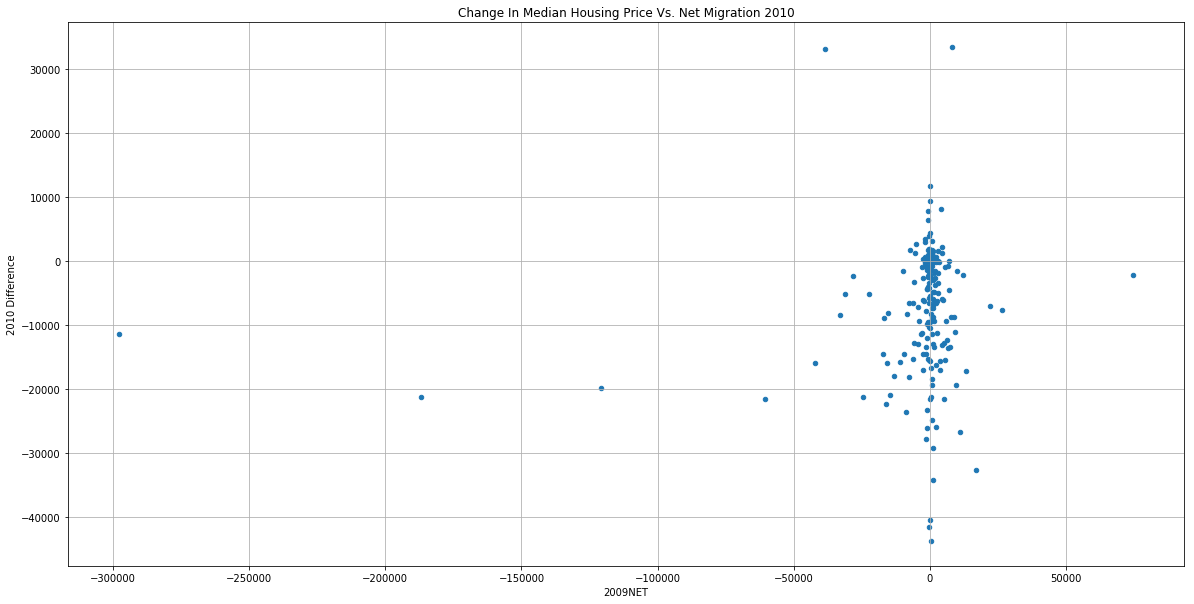

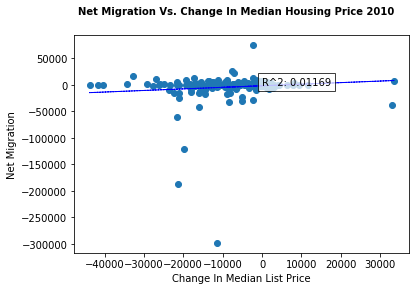

<Figure size 7200x4800 with 0 Axes>

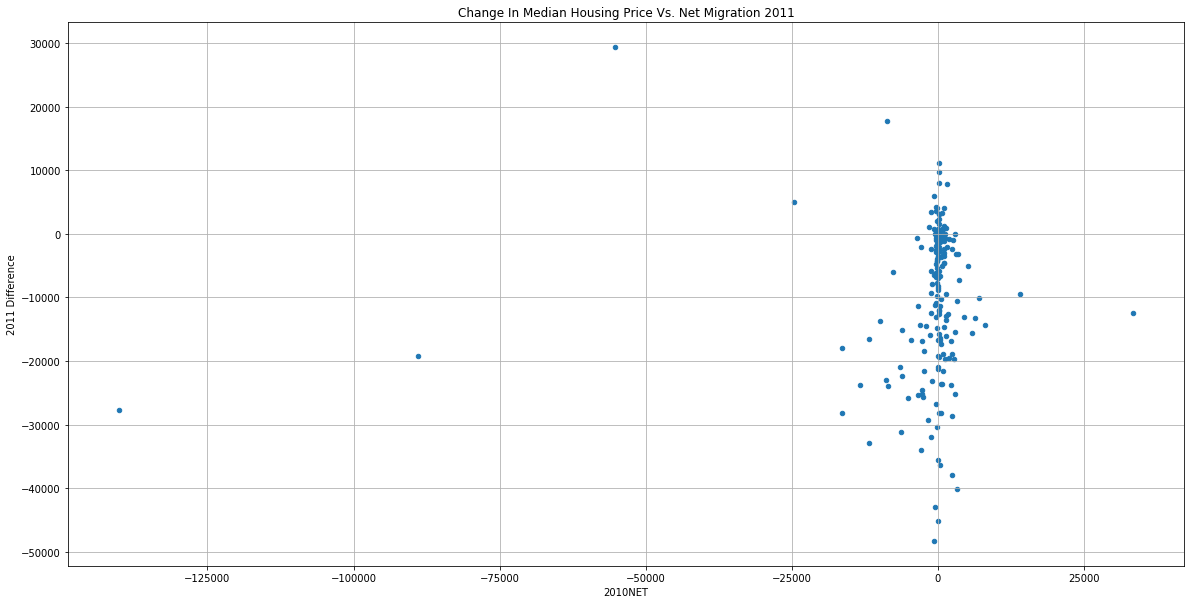

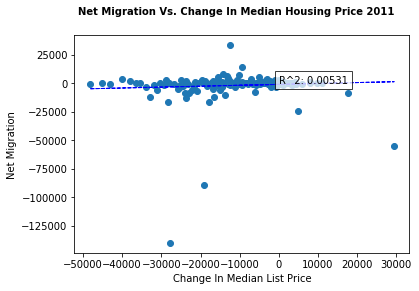

<Figure size 7200x4800 with 0 Axes>

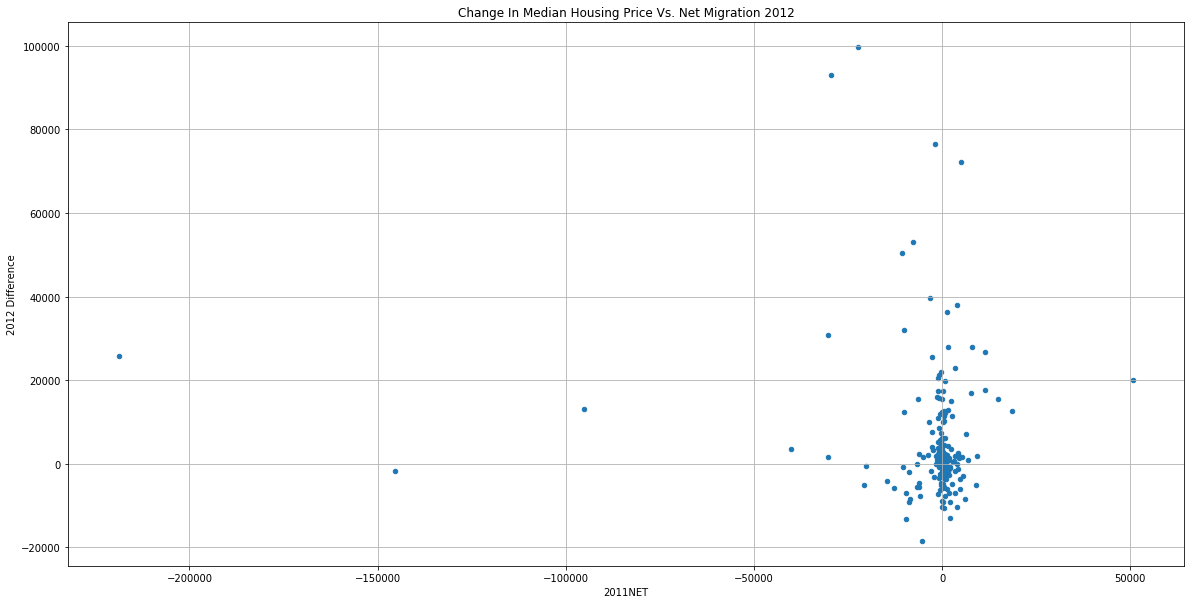

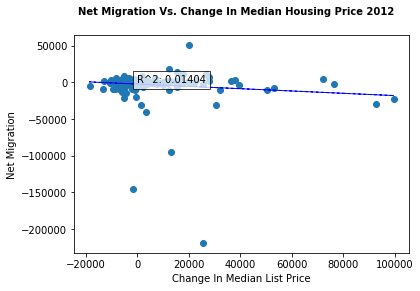

<Figure size 7200x4800 with 0 Axes>

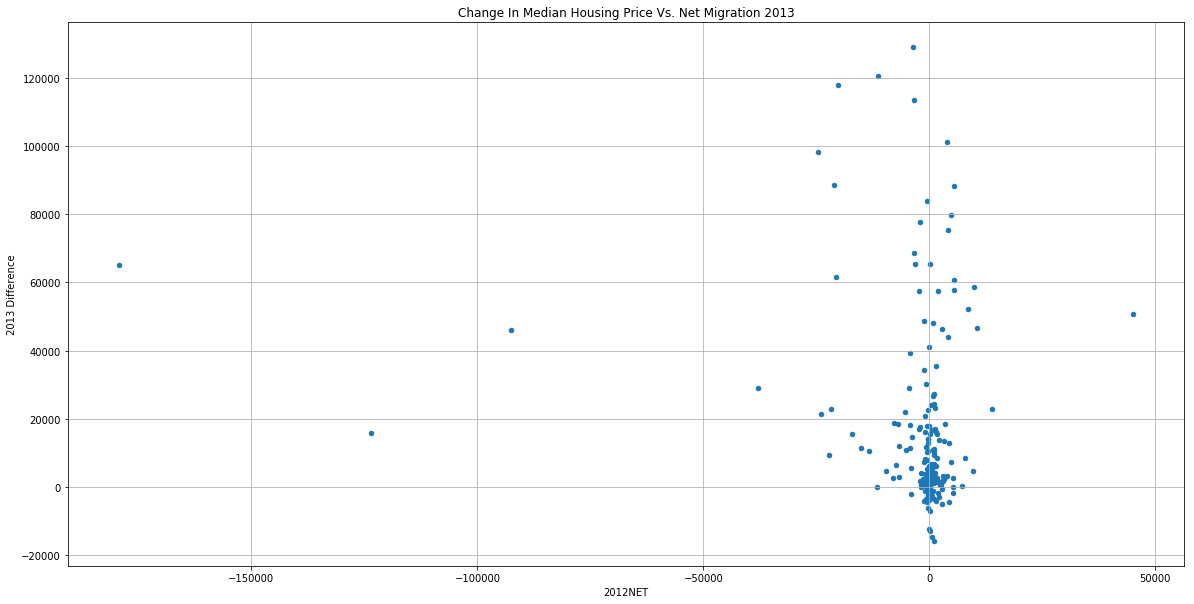

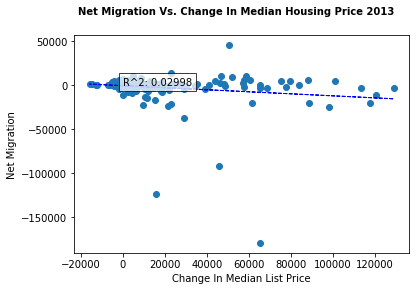

<Figure size 7200x4800 with 0 Axes>

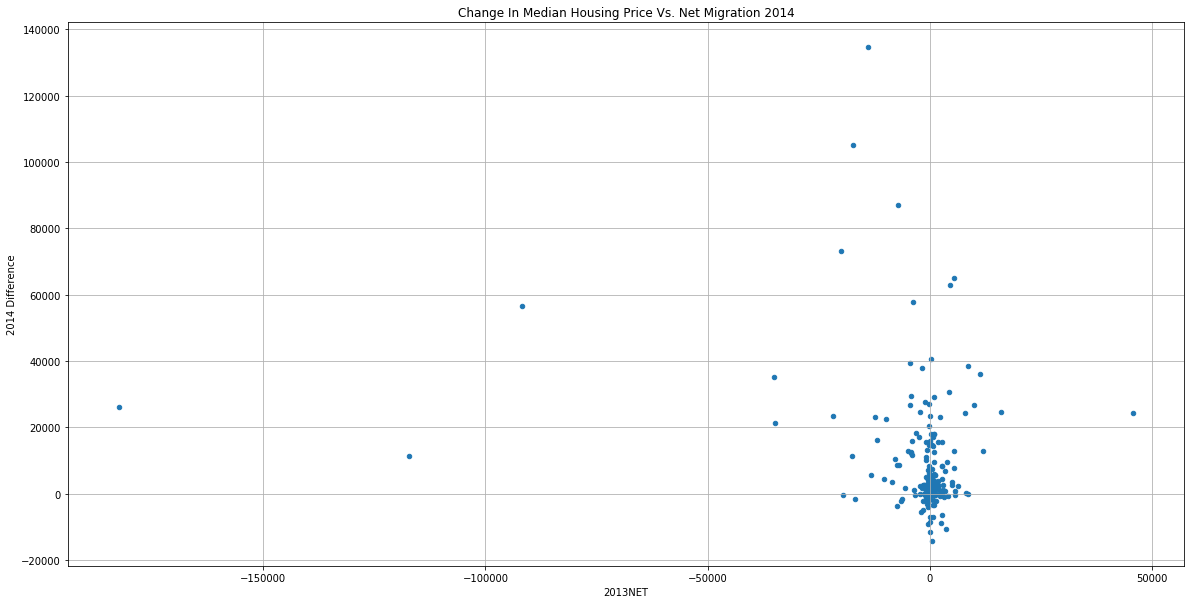

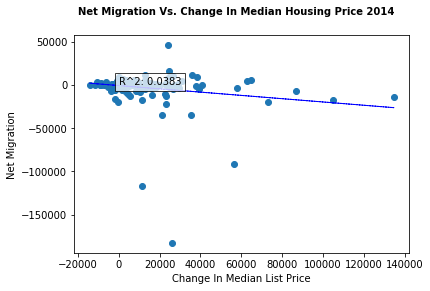

<Figure size 7200x4800 with 0 Axes>

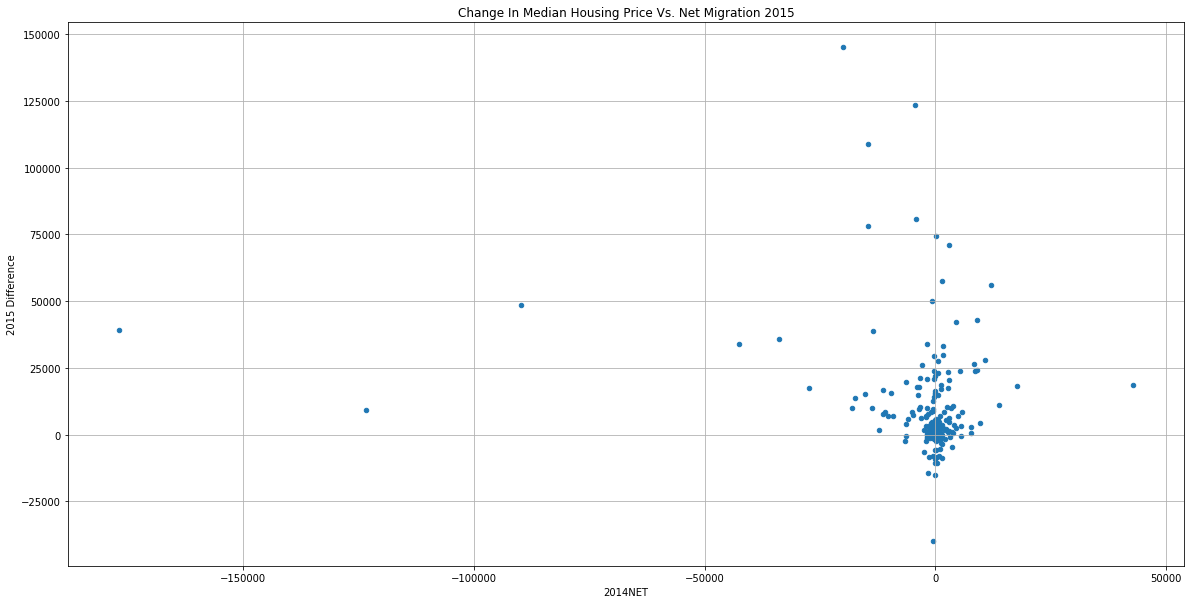

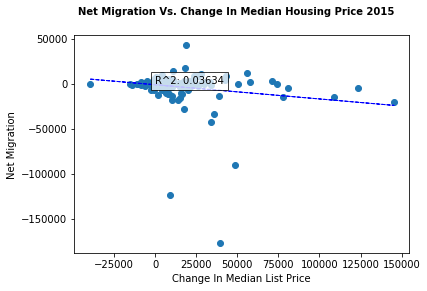

<Figure size 7200x4800 with 0 Axes>

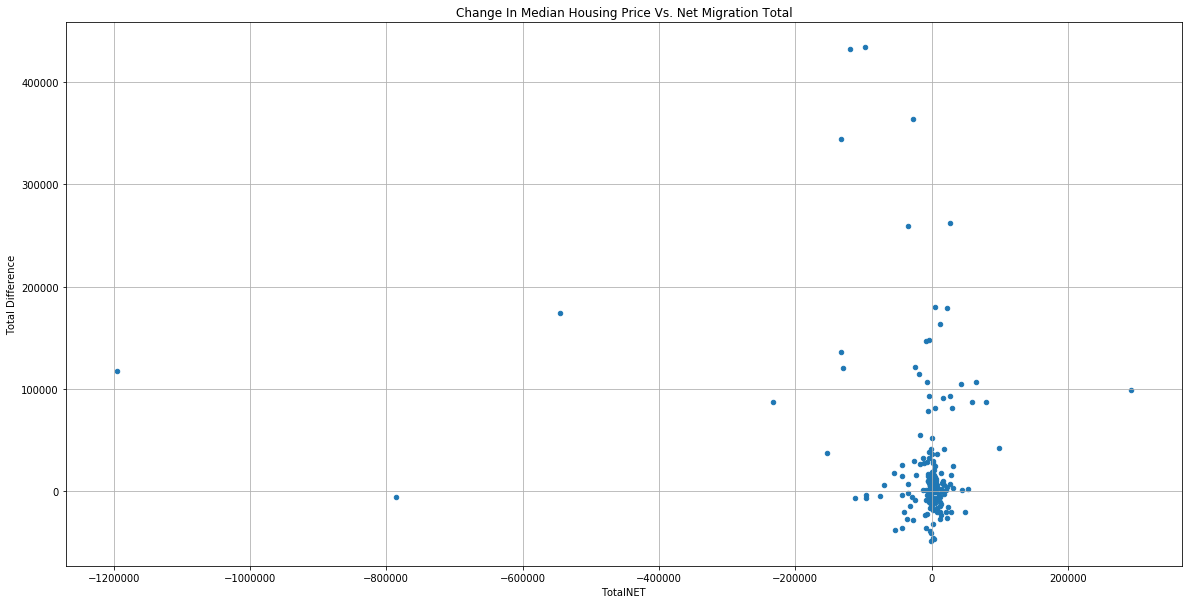

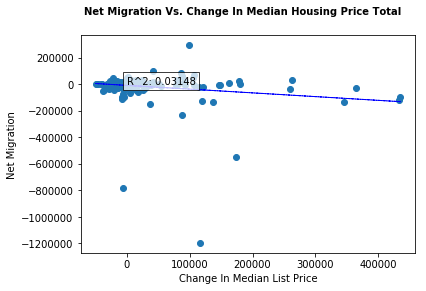

In [6]:
#Scatterplot compares year of census to year+1 of zillow. Also includes total
years.append("Total")


for year in years:
    #added try so we can include total in loop since you can't add 1 to a string, year2 used for zillow
    try:
         year2 = str(int(year) + 1)
    except: year2 = year
        
    plt.figure(dpi=1200)
   
    merge_output.plot(kind="scatter", x=f"{year}NET", 
                                              y=f"{year2} Difference", 
                                              grid=True, figsize=(20,10),
                                              title=f"Change In Median Housing Price Vs. Net Migration {year2}")
    
    difference = merge_output[f"{year2} Difference"]
    moved_net = merge_output[f"{year}NET"]
    
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(difference, moved_net)
    vc_fit = vc_slope * difference + vc_int

    fig, (ax1) = plt.subplots(1, sharex=True)
    fig.suptitle(f"Net Migration Vs. Change In Median Housing Price {year2}", fontsize=10, fontweight="bold")

    plt.ylabel("Net Migration")
    plt.xlabel("Change In Median List Price")
    #ax1.set_xlim(min(moved_net)-10000, max(moved_net)+10000)
    #ax1.set_ylim(min(difference)-10000, max(difference)+10000)
    ax1.plot(difference, moved_net, linewidth=0, marker="o")
    ax1.plot(difference, vc_fit, "b--", linewidth=1)
    plt.text(-5,-5,"R^2: "+str(round(vc_r**2,5)),bbox=dict(facecolor='white', alpha=0.75))
    
    plt.savefig(f"Census vs Zillow Scatter (SELECT STATES- Net Negative -PERC CHANGE) {year2}.png",dpi = 1000)
    plt.show()